Part 2 | Multiclassification Neural Networks | INFOTC 3040 | Max Warren

Import our data from loader.py and other dependicies

In [1]:
from loader import reshaped_images, labels

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

Loading category: gtsrb\0
Loading category: gtsrb\1
Loading category: gtsrb\2
Loading category: gtsrb\3
Loading category: gtsrb\4
Loading category: gtsrb\5
Loading category: gtsrb\6
Loading category: gtsrb\7
Loading category: gtsrb\8
Loading category: gtsrb\9
Loading category: gtsrb\10
Loading category: gtsrb\11
Loading category: gtsrb\12
Loading category: gtsrb\13
Loading category: gtsrb\14
Loading category: gtsrb\15
Loading category: gtsrb\16
Loading category: gtsrb\17
Loading category: gtsrb\18
Loading category: gtsrb\19
Loading category: gtsrb\20
Loading category: gtsrb\21
Loading category: gtsrb\22
Loading category: gtsrb\23
Loading category: gtsrb\24
Loading category: gtsrb\25
Loading category: gtsrb\26
Loading category: gtsrb\27
Loading category: gtsrb\28
Loading category: gtsrb\29
Loading category: gtsrb\30
Loading category: gtsrb\31
Loading category: gtsrb\32
Loading category: gtsrb\33
Loading category: gtsrb\34
Loading category: gtsrb\35
Loading category: gtsrb\36
Loading cat

Scale data and then split the data into 60:20:20 (similar code to part 1 for this part)

In [2]:
reshaped_images = StandardScaler().fit_transform(reshaped_images) #scale data using standard scalar

X_train, X_temp, y_train, y_temp = train_test_split(
    reshaped_images, labels, test_size=0.4, random_state=49, shuffle=True
)

X_cv, X_test, y_cv, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=25, shuffle=True
)

print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set: X_cv={X_cv.shape}, y_cv={y_cv.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")

Training set: X_train=(15984, 2700), y_train=(15984,)
Validation set: X_cv=(5328, 2700), y_cv=(5328,)
Test set: X_test=(5328, 2700), y_test=(5328,)


Build the neural network, I am going to use a function for ease of use. Using softmax on output layer and L2 regularization for all layers

In [3]:
def create_model(regularization):
    model = Sequential()
    
    
    model.add(Dense(96, input_shape=(2700,), activation='relu', 
                    kernel_regularizer=l2(regularization)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(regularization)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(regularization)))
    
    model.add(Dense(43, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',  # For integer labels
        metrics=['accuracy']
    )

    modelHistory = model.fit(
        X_train, y_train,
        validation_data=(X_cv, y_cv),
        epochs=60,  
        batch_size=16,
        verbose=0
    )
    
    return model, modelHistory

# Create the model
model, modelHistory = create_model(0.001)



c:\Users\maxwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Use model.evaluate() and model.predict() to assess our NN

In [4]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

y_pred = model.predict(X_test).argmax(axis=1)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100 
print(f"Prediction Accuracy: {accuracy:.2f}%")

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.9045 - loss: 0.6335
Test Loss: 0.6222, Test Accuracy: 0.9020
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
Prediction Accuracy: 90.20%


Use matplotlib to visualize loss for training and test sets

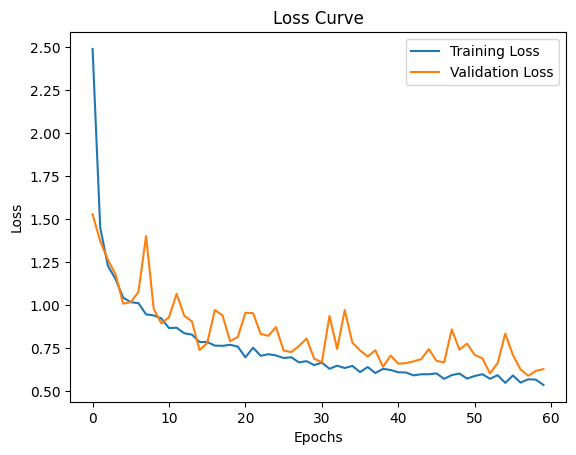

In [5]:
plt.plot(modelHistory.history['loss'], label='Training Loss')
plt.plot(modelHistory.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
